In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PyMieScatt as ps

def r2_manual(y_true, y_pred):
    # Soma dos quadrados dos resíduos
    ss_res = np.sum((y_true - y_pred) ** 2)
    
    # Soma total dos quadrados
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    
    # Cálculo do R²
    r2 = 1 - (ss_res / ss_tot)
    return r2


## 09/10/2025

### 1)

In [3]:
m1 = 1.403 + 0j
m2 = 1.589 + 0.273j
m3 = 1.47  + 0.011j
m4 = 1.50  + 0.02j

Lambda = 500
diametros = np.linspace(0.5e1,15e3,3000)
x =  np.pi *diametros/Lambda
Qs1 = []
Qs2 = []
Qs3 = []
Qs4 = []
Qa1 = []
Qa2 = []
Qa3 = []
Qa4 = []

for diametro in diametros:
    Qs1.append(ps.MieQ(m1,Lambda,diametro)[1])
    Qa1.append(ps.MieQ(m1,Lambda,diametro)[2])

for diametro in diametros:
    Qs2.append(ps.MieQ(m2,Lambda,diametro)[1])
    Qa2.append(ps.MieQ(m2,Lambda,diametro)[2])
for diametro in diametros:
    Qs3.append(ps.MieQ(m3,Lambda,diametro)[1]) 
    Qa3.append(ps.MieQ(m3,Lambda,diametro)[2])   

for diametro in diametros:
    Qs4.append(ps.MieQ(m4,Lambda,diametro)[1])
    Qa4.append(ps.MieQ(m4,Lambda,diametro)[2])



Esse Q representa a eficiencia

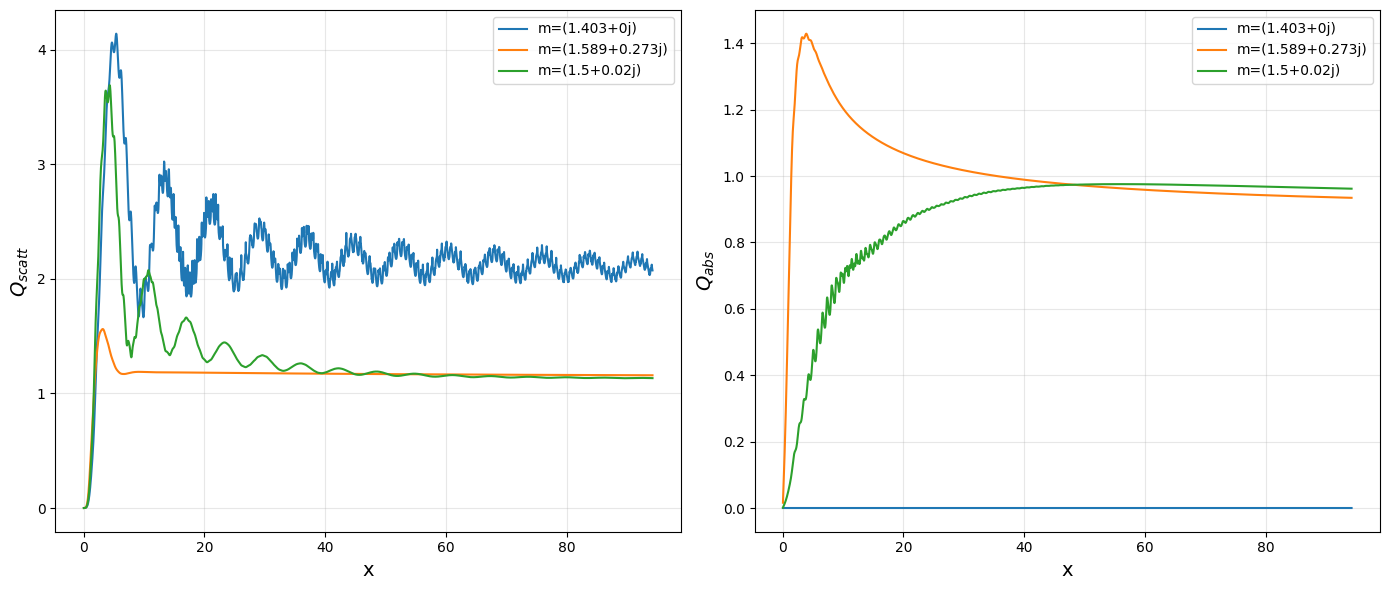

In [4]:
dados = [
    (x, Qs1, Qs2, Qs4, '$Q_{scatt}$'),
    (x, Qa1, Qa2, Qa4, '$Q_{abs}$'),
] 

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, (x, y1, y2,y3, title) in zip(axes.ravel(), dados):

    ax.plot(x,y1,label=f'm={m1}')
    ax.plot(x,y2,label=f'm={m2}')
    ax.plot(x,y3,label=f'm={m4}')

    #ax.set_xscale('log')
    ax.set_xlabel("x", fontsize=14)
    ax.set_ylabel(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()    
plt.show()

### 2)

In [47]:
lambdas = np.linspace(400,800,200)
m3 = 1.47  + 0.011j
sae = []
aae= []
r2s_scatt = []
r2s_abs = []

diameters = np.linspace(10,10e3,1000)

for d in diameters:
    Q_scatt = []
    Q_abs = []
    for Lambda in lambdas:
        Q_scatt.append(ps.MieQ(m=m3,wavelength=Lambda,diameter=d)[1])
        Q_abs.append(ps.MieQ(m=m3,wavelength=Lambda,diameter=d)[2])

    coeffs_scatt = np.polyfit(np.log(lambdas),np.log(Q_scatt),deg=1)
    Q_pred_scatt = coeffs_scatt[0]*np.log(lambdas) + coeffs_scatt[1]
    r2_scatt = r2_manual(np.log(Q_scatt),Q_pred_scatt)
    sae.append(-coeffs_scatt[0])
    r2s_scatt.append(r2_scatt)
    #plt.plot(lambdas,Q_scatt,label=f'd={d}')
    #plt.xlabel()
    #plt.legend()
    #plt.show()
    

    coeffs_abs = np.polyfit(np.log(lambdas),np.log(Q_abs),deg=1)
    Q_pred_abs = coeffs_abs[0]*np.log(lambdas) + coeffs_abs[1]
    r2_abs = r2_manual(np.log(Q_abs),Q_pred_abs)
    aae.append(-coeffs_abs[0])
    r2s_abs.append(r2_abs)

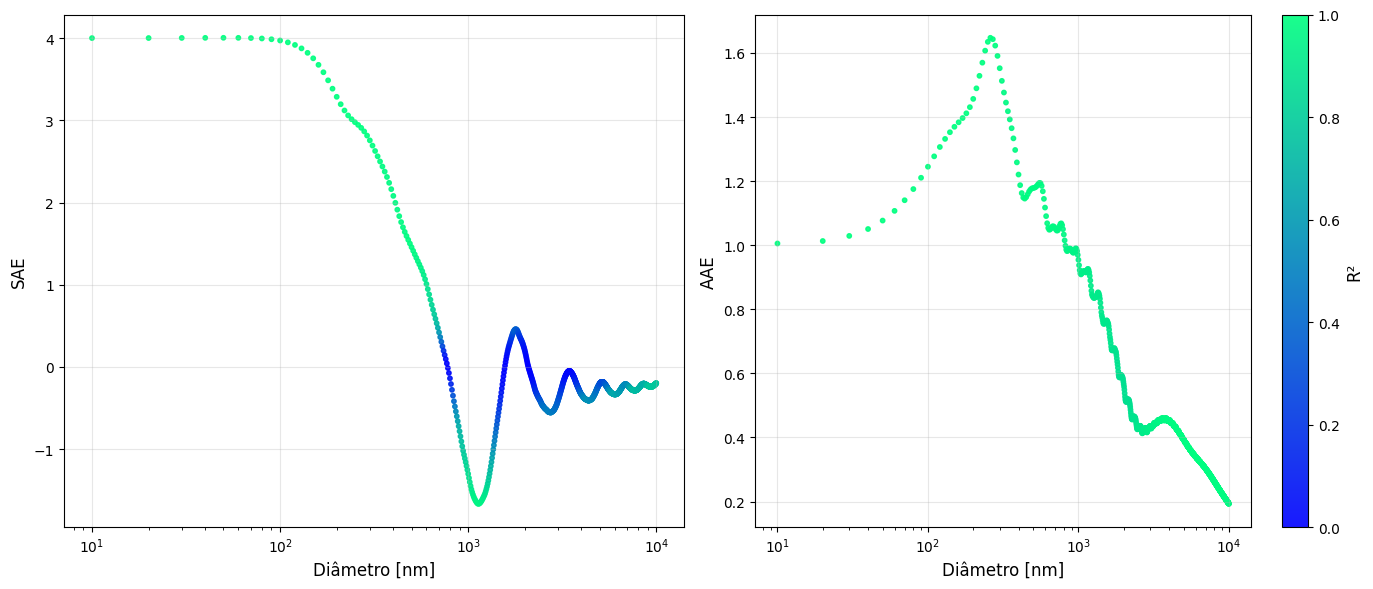

In [7]:
dados = [
    (diameters, sae, r2s_scatt, 'SAE'),
    (diameters, aae, r2s_abs,'AAE'),
] 

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, (x, y, r2, title) in zip(axes.ravel(), dados):

    scatter = ax.scatter(x, y, c=r2, cmap='winter', alpha=0.9, s=10,vmin=0, vmax=1.0)

    ax.set_xscale('log')
    ax.set_xlabel("Diâmetro [nm]", fontsize=12)
    ax.set_ylabel(title, fontsize=12)
    ax.grid(True, alpha=0.3)

cbar = fig.colorbar(scatter, ax=ax, label='R²')
cbar.set_label('R²', fontsize=12)
plt.tight_layout()    
plt.show()

 - Testar alguns indices de refração diferentes
 - Calcular AAE apenas com os lambdas do aetalometro e entender quanta informação é "perdida"
 - Espectros para intervalos diferentes de tamanho 
 - Comparar c o efeito de distribuições lognormais

## 23/04/2025

### - Mais indices de refração

/tmp/ipykernel_13427/2645438165.py:39: RuntimeWarning: divide by zero encountered in log
  coeffs_abs = np.polyfit(np.log(lambdas), np.log(Q_abs), deg=1)
/tmp/ipykernel_13427/2645438165.py:39: RuntimeWarning: invalid value encountered in log
  coeffs_abs = np.polyfit(np.log(lambdas), np.log(Q_abs), deg=1)
/tmp/ipykernel_13427/2645438165.py:41: RuntimeWarning: divide by zero encountered in log
  r2_abs = r2_manual(np.log(Q_abs), Q_pred_abs)
/tmp/ipykernel_13427/2645438165.py:41: RuntimeWarning: invalid value encountered in log
  r2_abs = r2_manual(np.log(Q_abs), Q_pred_abs)
/tmp/ipykernel_13427/2645438165.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


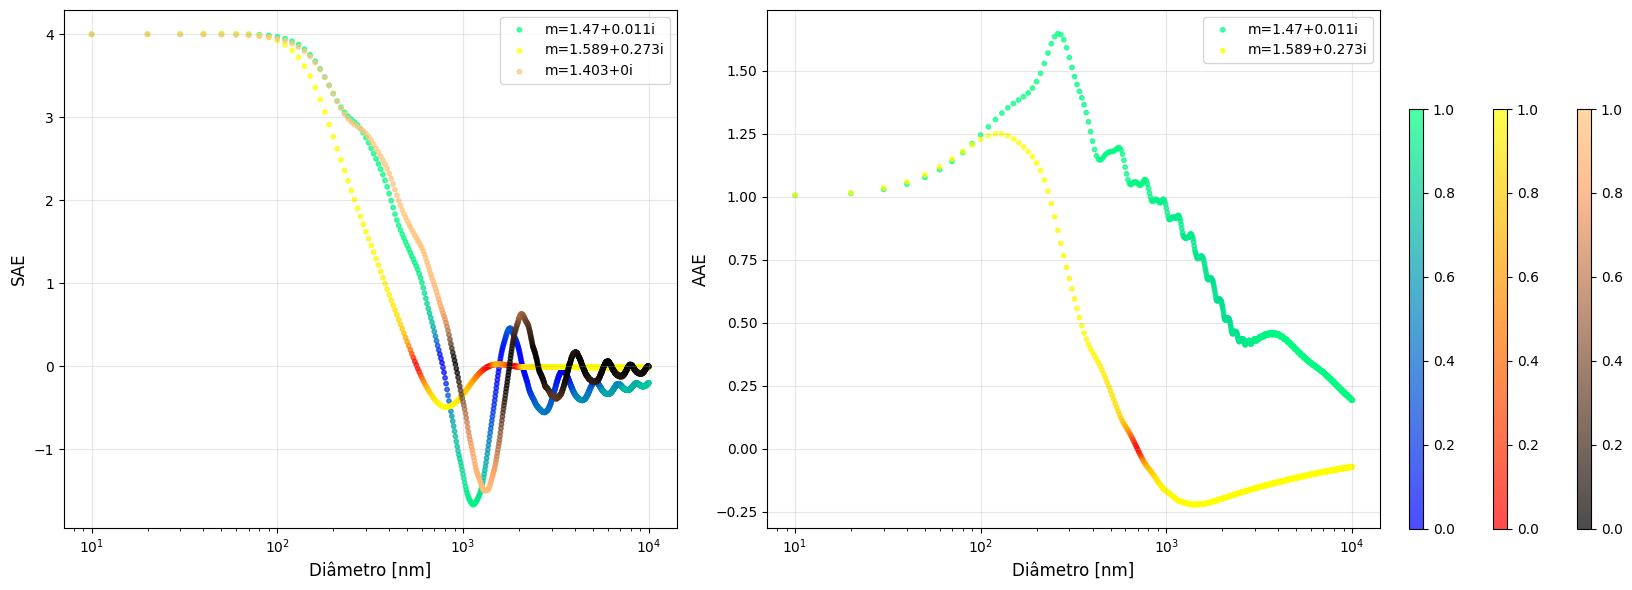

In [2]:
# Configurações iniciais
lambdas = np.linspace(400, 800, 200)
diameters = np.linspace(10, 10e3,1000)

# Lista de índices de refração que você quer analisar
m_list = [
    (1.47 ,0.011, 'm=1.47+0.011i','winter'),
    (1.589,0.273, 'm=1.589+0.273i','autumn'), 
    (1.403,0, 'm=1.403+0i','copper')   # Exemplo adicional 2
    # Adicione mais conforme necessário
]
  #  (1.403 + 0j, 'm=1.403+0i','*'),  # Exemplo adicional 1
# Preparar a figura
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
left = 1.01 # variavel para a coordenada horizontal do colobar
# Para cada índice de refração
for n, k, label, corMapa in m_list:
    sae = []
    aae = []
    r2s_scatt = []
    r2s_abs = []
    
    for d in diameters:
        Q_scatt = []
        Q_abs = []
        
        for Lambda in lambdas:
            Q_scatt.append(ps.MieQ(m=n +k*1j, wavelength=Lambda, diameter=d)[1])
            Q_abs.append(ps.MieQ(m=n +k*1j, wavelength=Lambda, diameter=d)[2])
        
        # Cálculo SAE
        coeffs_scatt = np.polyfit(np.log(lambdas), np.log(Q_scatt), deg=1)
        Q_pred_scatt = coeffs_scatt[0]*np.log(lambdas) + coeffs_scatt[1]
        r2_scatt = r2_manual(np.log(Q_scatt), Q_pred_scatt)
        sae.append(-coeffs_scatt[0])
        r2s_scatt.append(r2_scatt)
        
        # Cálculo AAE
        coeffs_abs = np.polyfit(np.log(lambdas), np.log(Q_abs), deg=1)
        Q_pred_abs = coeffs_abs[0]*np.log(lambdas) + coeffs_abs[1]
        r2_abs = r2_manual(np.log(Q_abs), Q_pred_abs)
        aae.append(-coeffs_abs[0])
        r2s_abs.append(r2_abs)
    
    # Plot SAE
    scatter1 = axes[0].scatter(diameters, sae, c=r2s_scatt, cmap=corMapa,s=10, alpha=0.7, label=label,vmin=0, vmax=1.0)
    axes[0].set_xscale('log')
    axes[0].set_xlabel("Diâmetro [nm]", fontsize=12)
    axes[0].set_ylabel('SAE', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    if k != 0:
        # Plot AAE
        scatter2 = axes[1].scatter(diameters, aae,c=r2s_abs,  cmap=corMapa,s=10, alpha=0.7, label=label,vmin=0, vmax=1.0)
        axes[1].set_xscale('log')
        axes[1].set_xlabel("Diâmetro [nm]", fontsize=12)
        axes[1].set_ylabel('AAE', fontsize=12)
        axes[1].grid(True, alpha=0.3)
        axes[1].legend()
    cbar_ax = fig.add_axes([left , 0.11, 0.01, 0.7])  # Color bar para o primeiro gráfico
    cbar= fig.colorbar(scatter1, cax=cbar_ax)
    left = left +0.06 #incremento na coordenada horizontal para evitar sobreposição
    
#cbar = fig.colorbar(scatter1, ax=axes[1], label='R²')
#cbar.set_label('R²', fontsize=12)
plt.tight_layout()
plt.show()

### Comparação com nossos equipamentos

In [3]:
lambdas = np.linspace(400,800,200)
m3 = 1.47  + 0.011j
sae = []
aae= []
r2s_scatt = []
r2s_abs = []

diameters = np.linspace(10,10e3,1000)

for d in diameters:
    Q_scatt = []
    Q_abs = []
    for Lambda in lambdas:
        Q_scatt.append(ps.MieQ(m=m3,wavelength=Lambda,diameter=d)[1])
        Q_abs.append(ps.MieQ(m=m3,wavelength=Lambda,diameter=d)[2])

    coeffs_scatt = np.polyfit(np.log(lambdas),np.log(Q_scatt),deg=1)
    Q_pred_scatt = coeffs_scatt[0]*np.log(lambdas) + coeffs_scatt[1]
    r2_scatt = r2_manual(np.log(Q_scatt),Q_pred_scatt)
    sae.append(-coeffs_scatt[0])
    r2s_scatt.append(r2_scatt)
    #plt.plot(lambdas,Q_scatt,label=f'd={d}')
    #plt.xlabel()
    #plt.legend()
    #plt.show()
    

    coeffs_abs = np.polyfit(np.log(lambdas),np.log(Q_abs),deg=1)
    Q_pred_abs = coeffs_abs[0]*np.log(lambdas) + coeffs_abs[1]
    r2_abs = r2_manual(np.log(Q_abs),Q_pred_abs)
    aae.append(-coeffs_abs[0])
    r2s_abs.append(r2_abs)

In [4]:
lambdas_nefe = [450,525,635]
m3 = 1.47  + 0.011j
sae_nefe = []
r2s_scatt_nefe = []

diameters = np.linspace(10,10e3,1000)

for d in diameters:
    Q_scatt = []
    for Lambda in lambdas_nefe:
        Q_scatt.append(ps.MieQ(m=m3,wavelength=Lambda,diameter=d)[1])

    coeffs_scatt = np.polyfit(np.log(lambdas_nefe),np.log(Q_scatt),deg=1)
    Q_pred_scatt = coeffs_scatt[0]*np.log(lambdas_nefe) + coeffs_scatt[1]
    r2_scatt = r2_manual(np.log(Q_scatt),Q_pred_scatt)
    sae_nefe.append(-coeffs_scatt[0])
    r2s_scatt_nefe.append(r2_scatt)

In [5]:
lambdas_aet = [370,470,520,590,660,880,950]
m3 = 1.47  + 0.011j
aae_aet = []
r2s_abs_aet = []

diameters = np.linspace(10,10e3,1000)

for d in diameters:
    Q_abs = []
    for Lambda in lambdas_aet:
        Q_abs.append(ps.MieQ(m=m3,wavelength=Lambda,diameter=d)[2])

    coeffs_abs = np.polyfit(np.log(lambdas_aet),np.log(Q_abs),deg=1)
    Q_pred_abs = coeffs_abs[0]*np.log(lambdas_aet) + coeffs_abs[1]
    r2_abs = r2_manual(np.log(Q_abs),Q_pred_abs)
    aae_aet.append(-coeffs_abs[0])
    r2s_abs_aet.append(r2_abs)

/tmp/ipykernel_13427/2049564393.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


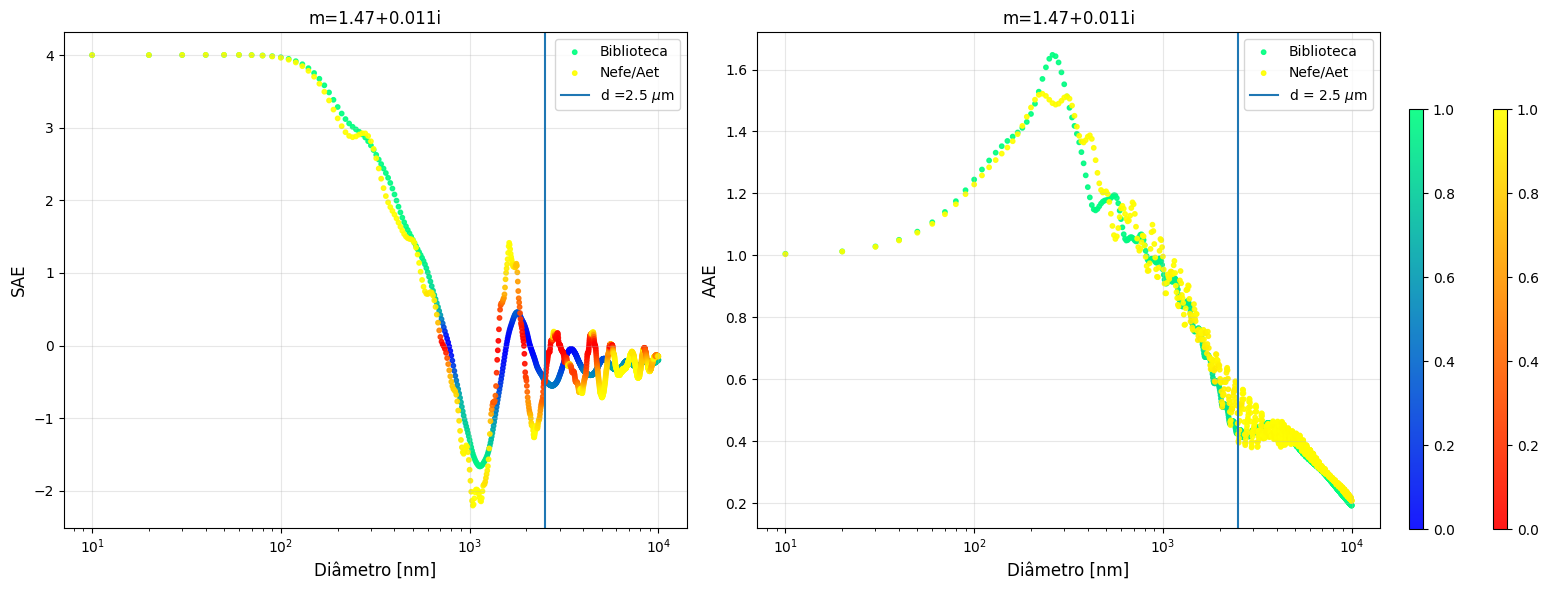

In [6]:
dados = [
    (diameters, sae, r2s_scatt, aae, r2s_abs,'Biblioteca','winter'),
    (diameters, sae_nefe, r2s_scatt_nefe, aae_aet, r2s_abs_aet,'Nefe/Aet','autumn'),
] 

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
left = 1.01 # variavel para a coordenada horizontal do colobar

for (diameters, sae_plot, r2s_scatt_plot, aae_plot, r2s_abs_plot,label,corMapa) in dados:

    scatter1 = axes[0].scatter(diameters, sae_plot, c=r2s_scatt_plot, cmap=corMapa, alpha=0.9, s=10,vmin=0, vmax=1.0,label=label)
    axes[0].set_xscale('log')
    axes[0].set_xlabel("Diâmetro [nm]", fontsize=12)
    axes[0].set_ylabel('SAE', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_title('m=1.47+0.011i')
    cbar_ax = fig.add_axes([left , 0.11, 0.01, 0.7])  # Color bar para o primeiro gráfico
    cbar= fig.colorbar(scatter1, cax=cbar_ax)
    left = left +0.06 #incremento na coordenada horizontal para evitar sobreposição
    
    scatter2 = axes[1].scatter(diameters, aae_plot, c=r2s_abs_plot, cmap=corMapa, alpha=0.9, s=10,vmin=0, vmax=1.0,label=label)
    axes[1].set_xscale('log')
    axes[1].set_xlabel("Diâmetro [nm]", fontsize=12)
    axes[1].set_ylabel('AAE', fontsize=12)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_title('m=1.47+0.011i')

axes[0].axvline(2.5e3,label='d =2.5 $\mu$m')
axes[1].axvline(2.5e3,label='d = 2.5 $\mu$m')
axes[0].legend()
axes[1].legend()

plt.tight_layout()    
plt.show()